[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 12.22

Classification of sex based on height using a logistic-regression model.\
Topics: Logistic regression, maximum likelihood, log-likelihood, logistic function 

Author: Carlos Fernandez-Granda\
Data source: http://mreed.umtri.umich.edu/mreed/downloads.html

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

data_men = pd.read_csv ("../data/ANSUR II MALE Public.csv", encoding='latin-1')
data_women = pd.read_csv ("../data/ANSUR II FEMALE Public.csv", encoding='latin-1')

font_size = 15
font_size_legend = 15
font_size_ticks = 15

stature_men = data_men['stature'] / 10.
stature_women = data_women['stature'] / 10.
stature_all = np.concatenate((stature_men,stature_women))

In [30]:
# Logistic regression model fit via maximum likelihood
height = np.concatenate((stature_women,stature_men))
X = np.array([height])
n = len(height)
y = np.ones(n)
aux_ones = len(stature_women)
y[:aux_ones] = 0
logistic_model = LogisticRegression(solver='lbfgs',penalty=None).fit(X.T, y)
beta_ml = logistic_model.coef_[0][0]
alpha_ml = logistic_model.intercept_[0]
print("Intercept:",round(alpha_ml,2))
print("Linear coefficient:",round(beta_ml,3))

Intercept: -48.6
Linear coefficient: 0.292


In [31]:
# Log-likelihood function
alpha_min = -100
alpha_max = -5
beta_min = 0 
beta_max = 0.55

def logistic_function(a):
    return 1/(1+np.exp(-a))
    
def log_likelihood(alpha, beta, x_0, x_1):
    llk = np.zeros(alpha.shape)
    for i in range(llk.shape[0]):
        for j in range(llk.shape[1]):
            llk[i,j] = ( np.sum( np.log( ( 1 - logistic_function(beta[i,j] * x_0 + alpha[i,j]) ) ) ) 
                        + np.sum( np.log(logistic_function(beta[i,j] * x_1 + alpha[i,j]))) )  
    return llk

alpha_mesh, beta_mesh = np.mgrid[alpha_min:alpha_max:200j,beta_min:beta_max:200j]
log_likelihood_vals = log_likelihood(alpha_mesh, beta_mesh, stature_women, stature_men)

log_likelihood_ML = log_likelihood(np.array([[alpha_ml]]), np.array([[beta_ml]]), stature_women,stature_men)
print("Maximum log likelihood",round(log_likelihood_ML[0][0],3))

/Users/carlos/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Maximum log likelihood -2086.648


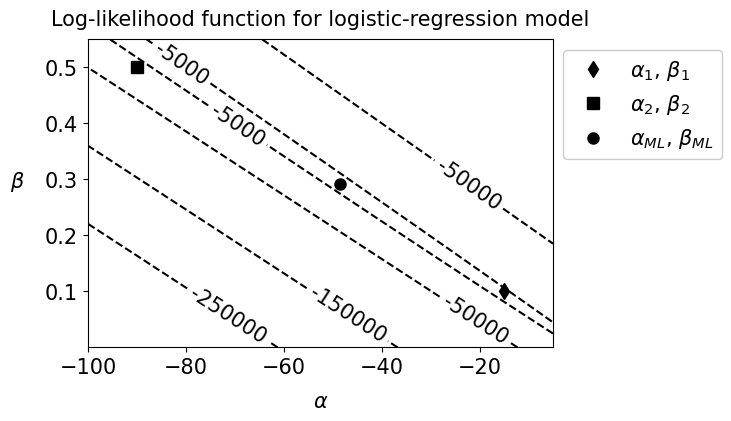

In [32]:
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

alpha_1 = -15 
beta_1 = 0.1
alpha_2 = -90 
beta_2 = 0.5

level_list = [-2.5e5,-1.5e5,-5e4,-5000]

msize = 8

plt.figure(figsize=(6,4))
ax = plt.axes()
CS = plt.contour(alpha_mesh, beta_mesh, log_likelihood_vals, 50, levels=
                 level_list
                 ,colors='black')
plt.plot(alpha_1, beta_1, "d",markerfacecolor='black',markeredgecolor="black", lw=2,markersize=msize, 
         label=r'$\alpha_1$, $\beta_1$')
plt.plot(alpha_2, beta_2, "s",markerfacecolor='black',markeredgecolor="black", lw=2,markersize=msize, 
         label=r'$\alpha_2$, $\beta_2$')
plt.plot(alpha_ml, beta_ml, "o",markerfacecolor='black',markeredgecolor="black", lw=2,markersize=msize, 
          label=r'$\alpha_{ML}$, $\beta_{ML}$')  
plt.clabel(CS, CS.levels, inline=True, fontsize=font_size_ticks,fmt=fmt)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(np.arange(0.1,0.6,0.1),fontsize=font_size_ticks) 
plt.xlabel(r"$\alpha$", fontsize=font_size,labelpad=10,)  
plt.ylabel(r"$\beta$", fontsize=font_size,labelpad=20, rotation=0)  
plt.legend(fontsize=font_size_ticks,numpoints=1,framealpha=1,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title("Log-likelihood function for logistic-regression model", fontsize=font_size,pad=10);

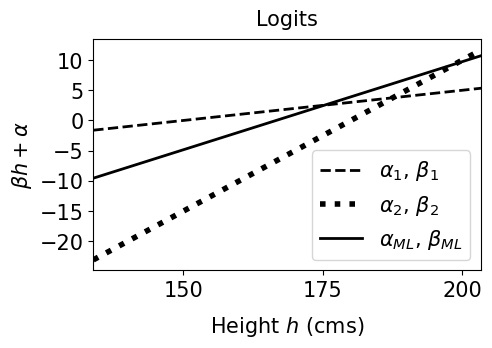

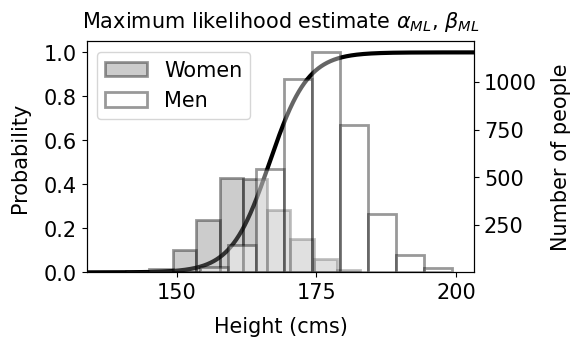

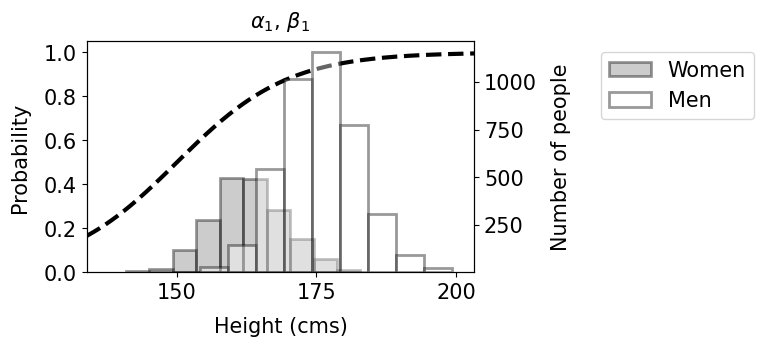

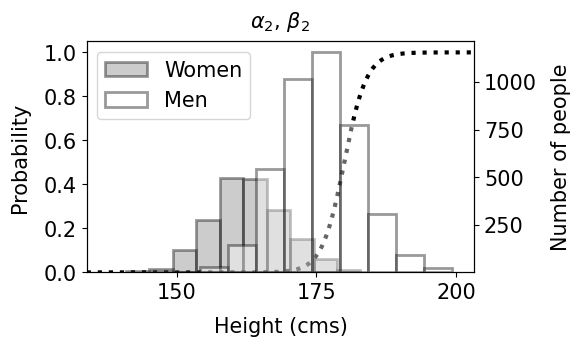

In [33]:
aux_ticks = np.arange(150,225,25)

step = 0.1
x_min = 0.95*np.min(stature_women)
x_max = 1.02*np.max(stature_men)
x_grid=np.arange(x_min,x_max+step,step)

logit_1 = beta_1 * x_grid + alpha_1
logit_2 = beta_2 * x_grid + alpha_2
logit_ml = beta_ml * x_grid + alpha_ml

prob_1 = logistic_function(logit_1)
prob_2 = logistic_function(logit_2)
prob_ml = logistic_function(logit_ml)

y_max_aux = 1.05

plt.figure(figsize=(5,3))
plt.xticks(aux_ticks,fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(x_grid,logit_1,lw=2,color="black",ls="dashed",label=r'$\alpha_1$, $\beta_1$')
plt.plot(x_grid,logit_2,lw=4,color="black",ls="dotted",label=r'$\alpha_2 $, $\beta_2 $')
plt.plot(x_grid,logit_ml,lw=2,color="black",label=r'$\alpha_{ML}$, $\beta_{ML}$')
plt.xlim([x_min,x_max])
plt.xlabel(r'Height $h$ (cms)',fontsize=font_size,labelpad=10)
plt.ylabel(r'$\beta h + \alpha$',fontsize=font_size)
plt.legend(fontsize=font_size_legend,loc="lower right")
plt.title("Logits", fontsize=font_size,pad=10);

line_width_hist = 2
line_width_line = 3

plt.figure(figsize=(5,3))
plt.xticks(aux_ticks,fontsize=font_size) 
plt.yticks(fontsize=font_size)
ax = plt.gca()
ax_2 = ax.twinx() 
ax_2.hist(stature_women,
          color='gray', edgecolor='black',alpha=0.4,
           linewidth=line_width_hist,density=False,label="Women")
ax_2.hist(stature_men,
          color='white', edgecolor='black',alpha=0.4,
           linewidth=line_width_hist,density=False,label="Men")
ax_2.set_yticks(np.arange(250,1250,250))
ax_2.tick_params(labelsize=font_size)
ax.set_ylim([0,y_max_aux])
ax.plot(x_grid,prob_ml,lw=line_width_line,color="black")
plt.xlim([x_min,x_max])
ax.set_xlabel('Height (cms)',fontsize=font_size,labelpad=10)
ax.set_ylabel('Probability', fontsize=font_size,labelpad=10)
ax_2.set_ylabel('Number of people', fontsize=font_size,labelpad=10)
plt.legend(fontsize=font_size_ticks,loc='upper left')
plt.title(r'Maximum likelihood estimate $\alpha_{ML}$, $\beta_{ML}$',pad=10,fontsize=font_size)

plt.figure(figsize=(5,3))
plt.xticks(aux_ticks,fontsize=font_size) 
plt.yticks(fontsize=font_size)
ax = plt.gca()
ax_2 = ax.twinx() 
ax_2.hist(stature_women,#bins=n_bins,log=True,
          color='gray', edgecolor='black',alpha=0.4,
           linewidth=line_width_hist,density=False,label="Women")
ax_2.hist(stature_men,#bins=n_bins,log=True,
          color='white', edgecolor='black',alpha=0.4,
           linewidth=line_width_hist,density=False,label="Men")
ax_2.set_yticks(np.arange(250,1250,250))
ax_2.tick_params(labelsize=font_size)
ax.set_ylim([0,y_max_aux])
ax.plot(x_grid,prob_1,lw=line_width_line,color="black",ls="dashed")
plt.xlim([x_min,x_max])
ax.set_xlabel('Height (cms)',fontsize=font_size,labelpad=10)
ax.set_ylabel('Probability', fontsize=font_size,labelpad=10)
ax_2.set_ylabel('Number of people', fontsize=font_size,labelpad=10)
plt.legend(fontsize=font_size_ticks,bbox_to_anchor=(1.3, 1), loc='upper left', ncol=1)
plt.title(r'$\alpha_1$, $\beta_1$',pad=10,fontsize=font_size)

plt.figure(figsize=(5,3))
plt.xticks(aux_ticks,fontsize=font_size) 
plt.yticks(fontsize=font_size)
ax = plt.gca()
ax_2 = ax.twinx() 
ax_2.hist(stature_women,#bins=n_bins,log=True,
          color='gray', edgecolor='black',alpha=0.4,
           linewidth=line_width_hist,density=False,label="Women")
ax_2.hist(stature_men,#bins=n_bins,log=True,
          color='white', edgecolor='black',alpha=0.4,
           linewidth=line_width_hist,density=False,label="Men")
ax_2.set_yticks(np.arange(250,1250,250))
ax_2.tick_params(labelsize=font_size)
ax.set_ylim([0,y_max_aux])
ax.plot(x_grid,prob_2,lw=line_width_line,color="black",ls="dotted")
plt.xlim([x_min,x_max])
ax.set_xlabel('Height (cms)',fontsize=font_size,labelpad=10)
ax.set_ylabel('Probability', fontsize=font_size,labelpad=10)
ax_2.set_ylabel('Number of people', fontsize=font_size,labelpad=10)
plt.legend(fontsize=font_size_ticks, loc='upper left')
plt.title(r'$\alpha_2$, $\beta_2$',pad=10,fontsize=font_size);